In [9]:
with open('reviews_data.txt', 'r', encoding='latin-1') as file:
  reviews = file.readlines()


In [31]:
import re

reviews_clean = [re.sub(r'^[A-Za-z]{3} \d{1,2} \d{4}\s+', '', review) for review in reviews]


# Limpiar el texto y dividirlo en palabras
reviews_clean = [
    re.findall(r'\b\w+\b', review.lower()) for review in reviews_clean
]

reviews_clean[:5]

[['nice',
  'trendy',
  'hotel',
  'location',
  'not',
  'too',
  'bad',
  'i',
  'stayed',
  'in',
  'this',
  'hotel',
  'for',
  'one',
  'night',
  'as',
  'this',
  'is',
  'a',
  'fairly',
  'new',
  'place',
  'some',
  'of',
  'the',
  'taxi',
  'drivers',
  'did',
  'not',
  'know',
  'where',
  'it',
  'was',
  'and',
  'or',
  'did',
  'not',
  'want',
  'to',
  'drive',
  'there',
  'once',
  'i',
  'have',
  'eventually',
  'arrived',
  'at',
  'the',
  'hotel',
  'i',
  'was',
  'very',
  'pleasantly',
  'surprised',
  'with',
  'the',
  'decor',
  'of',
  'the',
  'lobby',
  'ground',
  'floor',
  'area',
  'it',
  'was',
  'very',
  'stylish',
  'and',
  'modern',
  'i',
  'found',
  'the',
  'reception',
  's',
  'staff',
  'geeting',
  'me',
  'with',
  'aloha',
  'a',
  'bit',
  'out',
  'of',
  'place',
  'but',
  'i',
  'guess',
  'they',
  'are',
  'briefed',
  'to',
  'say',
  'that',
  'to',
  'keep',
  'up',
  'the',
  'coroporate',
  'image',
  'as',
  'i',
 

In [ ]:
!pip install gensim

In [40]:
import gensim
from gensim.models.callbacks import CallbackAny2Vec
import pickle

In [ ]:
documents = [
    "The quick brown fox jumps over the lazy dog.",
    "Artificial intelligence is transforming the world rapidly.",
    "Python is an incredibly versatile programming language.",
    "She sells seashells by the seashore on a sunny day.",
    "Data science involves statistics, coding, and domain expertise.",
    "In the heart of the forest, the birds sing their morning song.",
    "Space exploration has always captured the imagination of humanity.",
    "The coffee machine broke just before the morning rush.",
    "Quantum computing could revolutionize cryptography and data security.",
    "A warm cup of tea can be soothing on a cold winter evening."
]

In [32]:

class EpochLogger(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0

    def on_epoch_begin(self, model):
        print(f"Epoch #{self.epoch} start")

    def on_epoch_end(self, model):
        print(f"Epoch #{self.epoch} end")
        self.epoch += 1

epoch_logger = EpochLogger()

model = gensim.models.Word2Vec(
    reviews_clean,
    vector_size=100,
    window=10,
    min_count=5,
    workers=8,
    callbacks=[epoch_logger]  # Agrega aquí el callback
)

model.train(reviews_clean, total_examples=len(reviews_clean), epochs=10)


Epoch #0 start
Epoch #0 end
Epoch #1 start
Epoch #1 end
Epoch #2 start
Epoch #2 end
Epoch #3 start
Epoch #3 end
Epoch #4 start
Epoch #4 end


(317457001, 442951490)

In [41]:

# Guardar el modelo entrenado
with open('word2vec_model.pkl', 'wb') as f:
    pickle.dump(model, f)



In [42]:

# Cargar el modelo desde el archivo
with open('word2vec_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Verificar que se cargó correctamente
print(loaded_model)

Word2Vec<vocab=41034, vector_size=100, alpha=0.025>


In [44]:
print(model.wv.most_similar('street', topn=5))
print(model.wv.most_similar('good', topn=5))
print(model.wv.most_similar('dog', topn=5))
print(model.wv.most_similar('mother', topn=5))
print(model.wv.most_similar('bed', topn=5))



[('road', 0.9291480183601379), ('rd', 0.8572884798049927), ('steet', 0.8159644603729248), ('st', 0.7969922423362732), ('rue', 0.7910244464874268)]
[('decent', 0.8624623417854309), ('great', 0.8367952704429626), ('terrific', 0.7593527436256409), ('nice', 0.721747875213623), ('excellent', 0.7087845206260681)]
[('dogs', 0.7574458122253418), ('pet', 0.659030020236969), ('child', 0.5969492793083191), ('companion', 0.5710262060165405), ('kid', 0.570975124835968)]
[('daughter', 0.9118806719779968), ('mom', 0.9115695357322693), ('father', 0.9108458161354065), ('brother', 0.8895174860954285), ('niece', 0.8737837672233582)]
[('beds', 0.8287075161933899), ('mattress', 0.7204299569129944), ('sofabed', 0.6456068158149719), ('cushion', 0.6270135641098022), ('matress', 0.6164328455924988)]


## Palabras:

• street: ['road', 'rd', 'steet', 'st', 'rue' ]

• good: ['decent', 'great', 'terrific', 'nice', 'excellent']

• dog: ['dogs', 'pet', 'child', 'companion', 'kid']

• mother: ['daughter', 'mom', 'father', 'brother', 'niece']

• bed: ['beds', 'mattress', 'sofabed', 'cushion', 'matress']

## Embeddings

In [46]:
words = [
    'street', 'road', 'rd', 'steet', 'st', 'rue',
    'good', 'decent', 'great', 'terrific', 'nice', 'excellent',
    'dog', 'dogs', 'pet', 'child', 'companion', 'kid',
    'mother', 'daughter', 'mom', 'father', 'brother', 'niece',
    'bed', 'beds', 'mattress', 'sofabed', 'cushion', 'matress'
]

# Extraer los embeddings para cada palabra
embeddings = {word: model.wv[word] for word in words if word in model.wv}

# Mostrar los embeddings de algunas palabras
for word, vector in list(embeddings.items())[:5]:
    print(f"{word}: {vector}\n")


street: [ 3.5071368e+00 -6.6776571e+00 -8.8021976e-01 -4.0421886e+00
  3.1616256e+00  2.0084736e+00  1.0562789e+00 -3.7679935e+00
 -3.5750046e+00  7.2387233e+00  2.1264343e+00 -1.6763390e+00
  1.2294079e+00  9.8649532e-01 -5.9197992e-01 -2.7778769e+00
  5.7380586e+00  2.8585602e-02  1.2852962e+00 -3.2482345e+00
 -3.0977368e-01  3.2041500e+00 -2.7773521e+00  4.9491373e-01
  4.0170693e+00 -1.4023197e-01  7.6018763e-01  3.9948418e+00
 -2.9805973e+00  1.4270431e+00  4.5682530e+00 -2.5710473e+00
  9.5733566e+00 -2.5779379e-03  6.3287973e+00  4.5199184e+00
  3.4860106e+00  2.0303822e+00 -5.8374224e+00 -3.8855011e+00
 -6.7651691e+00  5.0746403e+00 -1.9395626e+00 -3.2880682e-01
  6.6993532e+00 -6.2822574e-01 -2.2609251e+00 -1.6661205e+00
 -8.3741605e-01  1.1649213e+00 -4.5893344e-01 -9.6571932e+00
  3.6039144e-01  2.2756355e+00 -8.3747625e+00 -1.7876891e+00
  2.9078953e+00  3.0125077e+00 -2.6785207e+00  6.8423824e+00
 -6.1792111e+00 -2.9024546e+00  1.0891114e+00 -1.3634914e+00
  8.8765109e-01 

## Reducir la dimensionalidad

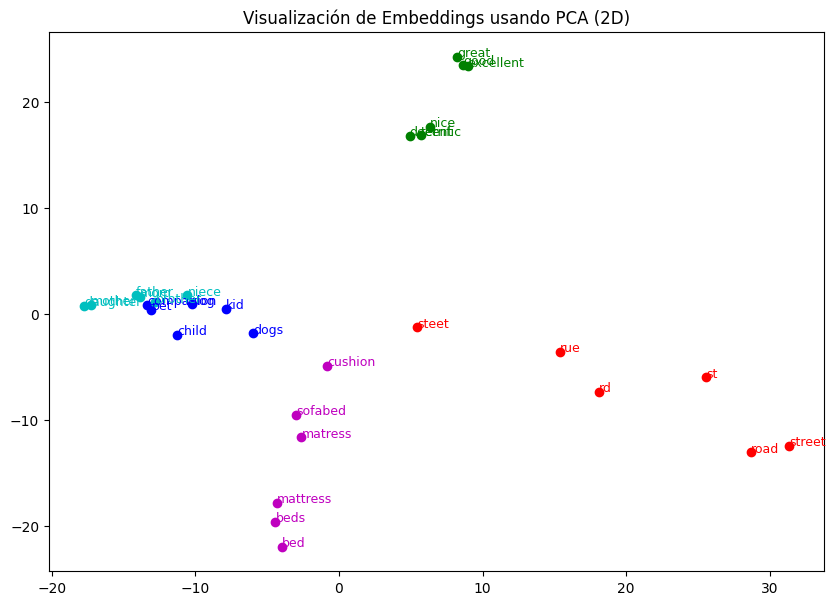

In [48]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Extraer los embeddings en una matriz
embedding_matrix = np.array(list(embeddings.values()))

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embedding_matrix)

# Obtener las palabras correspondientes
words_list = list(embeddings.keys())

colors = ['r', 'g', 'b', 'c', 'm', 'y']


# Visualizar los embeddings reducidos
plt.figure(figsize=(10, 7))

for i, word in enumerate(words_list):
    x, y = reduced_embeddings[i]
    color = colors[i // 6]
    plt.scatter(x, y, marker='o', color=color)
    plt.text(x + 0.01, y + 0.01, word, fontsize=9, color=color)

plt.title("Visualización de Embeddings usando PCA (2D)")
plt.show()
